In [1]:
#Import the librairies
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt

import seaborn as sns

#Import the dataset
data = 'flight_data_2024_sample.csv'
flight_df = pd.read_csv(data)
print(flight_df.head())

   year  month  day_of_month  day_of_week     fl_date op_unique_carrier  \
0  2024      4            18            4  2024-04-18                MQ   
1  2024      1             1            1  2024-01-01                AA   
2  2024     12            12            4  2024-12-12                9E   
3  2024      4             8            1  2024-04-08                WN   
4  2024      2            16            5  2024-02-16                WN   

   op_carrier_fl_num origin       origin_city_name origin_state_nm  ...  \
0             3535.0    DFW  Dallas/Fort Worth, TX           Texas  ...   
1              148.0    CLT          Charlotte, NC  North Carolina  ...   
2             5440.0    CHA        Chattanooga, TN       Tennessee  ...   
3             1971.0    OMA              Omaha, NE        Nebraska  ...   
4              862.0    BWI          Baltimore, MD        Maryland  ...   

  diverted crs_elapsed_time actual_elapsed_time  air_time  distance  \
0        0            151.0

## Clean the Dataset

### Remove none important independent variables

In [2]:
print(flight_df.columns)

flight_df.drop(['taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
    'cancellation_code', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'], axis=1, inplace=True)
print(flight_df.columns)

Index(['year', 'month', 'day_of_month', 'day_of_week', 'fl_date',
       'op_unique_carrier', 'op_carrier_fl_num', 'origin', 'origin_city_name',
       'origin_state_nm', 'dest', 'dest_city_name', 'dest_state_nm',
       'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'cancellation_code', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')
Index(['year', 'month', 'day_of_month', 'day_of_week', 'fl_date',
       'op_unique_carrier', 'op_carrier_fl_num', 'origin', 'origin_city_name',
       'origin_state_nm', 'dest', 'dest_city_name', 'dest_state_nm',
       'crs_dep_time', 'dep_time', 'dep_delay', 'cancelled', 'distance'],
      dtype='object')


### Remove cancelled flights

In [3]:
flight_df = flight_df[flight_df['cancelled'] == 0]

print(flight_df)

      year  month  day_of_month  day_of_week     fl_date op_unique_carrier  \
0     2024      4            18            4  2024-04-18                MQ   
1     2024      1             1            1  2024-01-01                AA   
2     2024     12            12            4  2024-12-12                9E   
3     2024      4             8            1  2024-04-08                WN   
4     2024      2            16            5  2024-02-16                WN   
...    ...    ...           ...          ...         ...               ...   
9995  2024      1            16            2  2024-01-16                WN   
9996  2024      7             5            5  2024-07-05                AA   
9997  2024      2            28            3  2024-02-28                MQ   
9998  2024      2            18            7  2024-02-18                DL   
9999  2024      3             1            5  2024-03-01                G4   

      op_carrier_fl_num origin       origin_city_name origin_st

## Create new categories

In [4]:
flight_df['flight_delayed'] = (flight_df['dep_delay'] > 0).astype(int)
print(flight_df.head())

   year  month  day_of_month  day_of_week     fl_date op_unique_carrier  \
0  2024      4            18            4  2024-04-18                MQ   
1  2024      1             1            1  2024-01-01                AA   
2  2024     12            12            4  2024-12-12                9E   
3  2024      4             8            1  2024-04-08                WN   
4  2024      2            16            5  2024-02-16                WN   

   op_carrier_fl_num origin       origin_city_name origin_state_nm dest  \
0             3535.0    DFW  Dallas/Fort Worth, TX           Texas  RAP   
1              148.0    CLT          Charlotte, NC  North Carolina  PHX   
2             5440.0    CHA        Chattanooga, TN       Tennessee  ATL   
3             1971.0    OMA              Omaha, NE        Nebraska  LAS   
4              862.0    BWI          Baltimore, MD        Maryland  MYR   

     dest_city_name   dest_state_nm  crs_dep_time  dep_time  dep_delay  \
0    Rapid City, SD    S

# KNN: K-Nearest Neighbour

In [5]:
print(flight_df.shape)
# Display the first few rows of the DataFrame
flight_df.head()

(9878, 19)


,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,dest,dest_city_name,dest_state_nm,crs_dep_time,dep_time,dep_delay,cancelled,distance,flight_delayed
0,2024,4,18,4,2024-04-18,MQ,3535.0,DFW,"Dallas/Fort Worth, TX",Texas,RAP,"Rapid City, SD",South Dakota,1018,1015.0,-3.0,0,835.0,0
1,2024,1,1,1,2024-01-01,AA,148.0,CLT,"Charlotte, NC",North Carolina,PHX,"Phoenix, AZ",Arizona,1637,1633.0,-4.0,0,1773.0,0
2,2024,12,12,4,2024-12-12,9E,5440.0,CHA,"Chattanooga, TN",Tennessee,ATL,"Atlanta, GA",Georgia,1000,952.0,-8.0,0,106.0,0
3,2024,4,8,1,2024-04-08,WN,1971.0,OMA,"Omaha, NE",Nebraska,LAS,"Las Vegas, NV",Nevada,1330,1334.0,4.0,0,1099.0,1
4,2024,2,16,5,2024-02-16,WN,862.0,BWI,"Baltimore, MD",Maryland,MYR,"Myrtle Beach, SC",South Carolina,1340,1333.0,-7.0,0,399.0,0


<function matplotlib.pyplot.show(close=None, block=None)>

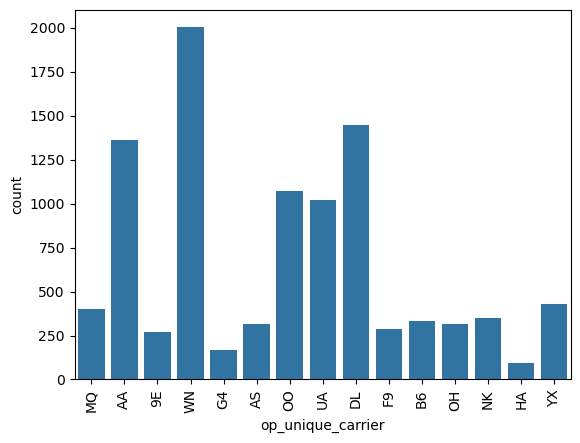

In [6]:
# count plot of the op_unique_carrier
sns.countplot(data=flight_df, x="op_unique_carrier")
plt.xticks(rotation=90)
plt.show

In [46]:
# Select relevant columns (excluding dep_delay for prediction)
features = [
    'year', 'month', 'day_of_month', 'day_of_week', 'op_unique_carrier',
    'origin', 'dest', 'distance', 'dep_time'
]
X = flight_df[features]
y = flight_df['flight_delayed']


In [47]:
# Encode categorical variables
X = pd.get_dummies(X, columns=['op_unique_carrier', 'origin', 'dest'], drop_first=True)

# Split into train/test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fit KNN Model and Evaluate

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, precision_score, recall_score, f1_score
)
# Define the model
knn = KNeighborsClassifier()

# Define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(knn, X_train_scaled, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC (CV): %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean ROC AUC (CV): 0.545 (0.011)


In [55]:
# Fit the model
knn.fit(X_train_scaled, y_train)

# Make predictions on the train set  
y_pred_train = knn.predict_proba(X_train_scaled)[:, 1]  # Get the probabilities for the positive class
# Make predictions on the test set
y_pred_test = knn.predict_proba(X_test_scaled)[:, 1]  # Get the probabilities for the positive class    

Train ROC AUC: 0.777
Test ROC AUC: 0.506


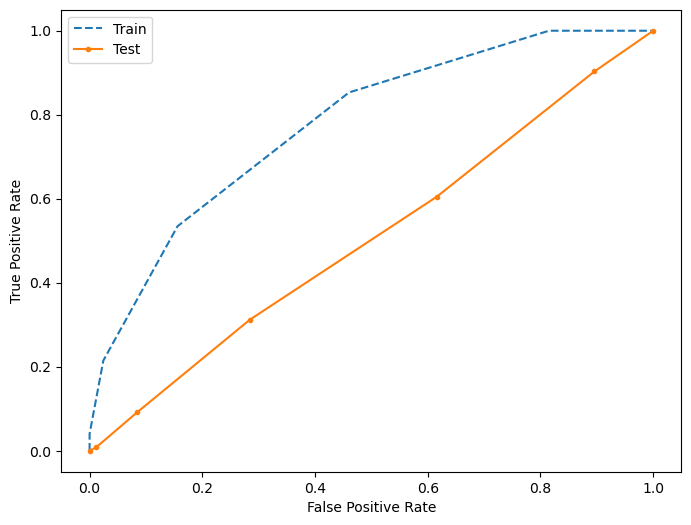

In [56]:
# Evaluate the model using ROC AUC curve
from sklearn.metrics import roc_auc_score   
roc_auc_train = roc_auc_score(y_train, y_pred_train)
roc_auc_test = roc_auc_score(y_test, y_pred_test)
print(f'Train ROC AUC: {roc_auc_train:.3f}')
print(f'Test ROC AUC: {roc_auc_test:.3f}')

# Plot the ROC Curve for the training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)  
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, linestyle='--', label='Train')
plt.plot(fpr_test, tpr_test, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In [58]:
# define a classification_evaluation function(model, X_train, y_train, X_test, y_test, threshold=0.5):
def classification_evaluation(model, X_train, y_train, X_test, y_test, threshold=0.5):
    from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score

    train_pred = model.predict_proba(X_train)[:, 1]
    test_pred = model.predict_proba(X_test)[:, 1]
    
    train_auc = roc_auc_score(y_train, train_pred)
    test_auc = roc_auc_score(y_test, test_pred)
    
    fpr_train, tpr_train, _ = roc_curve(y_train, train_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, test_pred)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, linestyle='--', label='Train')
    plt.plot(fpr_test, tpr_test, marker='.', label='Test')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    print("Training ROC AUC score:", train_auc)
    print("Testing ROC AUC score:", test_auc)
    print("Train Accuracy: %.3f" % accuracy_score(y_train, train_pred > threshold))
    print("Test Accuracy: %.3f" % accuracy_score(y_test, test_pred > threshold))
    # report precision, recall and f1 score for the training and testing sets
    print("Train Precision: %.3f" % precision_score(y_train, train_pred > threshold))   
    print("Test Precision: %.3f" % precision_score(y_test, test_pred > threshold))
    print("Train Recall: %.3f" % recall_score(y_train, train_pred > threshold)) 
    print("Test Recall: %.3f" % recall_score(y_test, test_pred > threshold))
    print("Train F1 Score: %.3f" % f1_score(y_train, train_pred > threshold))
    print("Test F1 Score: %.3f" % f1_score(y_test, test_pred > threshold))

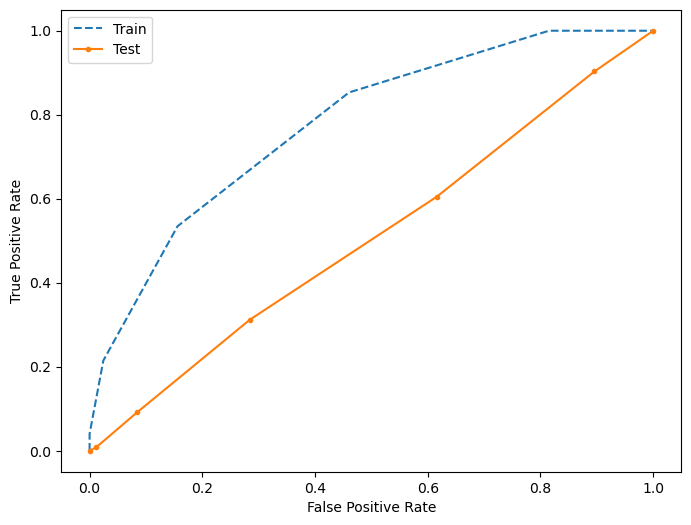

Training ROC AUC score: 0.7771208463232129
Testing ROC AUC score: 0.5061186598957844
Train Accuracy: 0.729
Test Accuracy: 0.568
Train Precision: 0.670
Test Precision: 0.387
Train Recall: 0.534
Test Recall: 0.312
Train F1 Score: 0.595
Test F1 Score: 0.345


In [59]:
# print classification_evaluation
classification_evaluation(knn, X_train_scaled, y_train, X_test_scaled, y_test, threshold=0.5)